# MATH0487-2 : Eléments de statistiques
## Devoir 2 - Modèles (suite), estimation ponctuelle et par intervalle, et tests d'hypothèse
### L'équipe de MATH0487
#### Université de Liège, Novembre 2022

---

<!-- BEGIN QUESTION -->

**Nom(s), Prénom(s) et matricule(s) :**

<span style="color:red">Manon GERARD s201354 ; Charline DANTINNE s201485</span>

<!-- END QUESTION -->

---

## Instructions générales

### Objectifs

Les objectifs de ce devoir sont les suivants : 

- calculer et comparer des *estimateurs ponctuels* pour les paramètres d'un modèle statistique,

- calculer et comparer des *estimateurs par intervalle* pour les paramètres d'un modèle statistique,

- réaliser des *tests d'hypothèse* sur les moyennes de population.

### Délivrables

Ce devoir doit être réalisé par groupe de 2 étudiants maximum. Chaque groupe doit
rendre ce notebook complété, et rien d'autre. 

La date limite de soumission est fixée au **20 décembre 2022**. Jusqu’à cette date, vous avez la possibilité de (re)soumettre votre rapport ou votre code autant de fois que vous le souhaitez. Au-delà de cette date, il ne sera plus possible de soumettre le devoir. N’attendez pas la dernière minute pour soumettre une première version de votre travail !

La soumission doit se faire sur la plateforme [Gradescope](https://www.gradescope.com/) directement. 

- Chaque étudiant doit s'inscrire sur [Gradescope](https://www.gradescope.com/) en utilisant son adresse `@student.uliege.be`. Si vous ne voyez pas le cours MATH0487 dans votre tableau de bord, contactez-nous sur [Ed](https://edstem.org/us/dashboard) au plus vite (n'attendez pas la veille de la date de soumission pour vérifier que vous avez accès au cours sur Gradescope ;- ).

- Chaque groupe doit soumettre un seul fichier `.ipynb` sur [Gradescope](https://www.gradescope.com/). Toutes les cellules doivent être exécutables et leurs sorties ne doivent pas être effacées avant la soumission (les sorties doivent être **visibles**). Assurez-vous que tous les membres du groupe sont correctement ajoutés à la soumission !

Si vous n'êtes pas familier avec Gradescope, vous trouverez des explicationns sur chaque étape de la soumission ci-dessous :
- [Soumission de code](https://help.gradescope.com/article/ccbpppziu9-student-submit-work#code_submissions),
- [Ajout de membres de groupe](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

***Remarques importantes*** sur l'utilisation de ce notebook :
- Ne modifiez et ne supprimez pas de cellules (Markdown) contenant des consignes/questions.
- Remplissez uniquement les cellules prévues à cet effet (`...` indique une portion réservée à votre code, et <span style="color:red">VOTRE TEXTE ICI</span> indique une portion réservée à une réponse écrite), n'en créez pas de nouvelles; si, pour une raison quelconque, vous veniez à supprimer une cellule prédéfinie, il vous est demandé de télécharger à nouveau le notebook vierge et de copier le contenu déjà développé de votre côté dans cette copie vierge.
- Respectez le type de cellule prévu pour une question donnée: certaines questions demandent d'implémenter du code (cellules "Code", en Python) et de présenter des résultats (valeurs numériques, tables, graphes, ...), et d'autres vous demandent de fournir une réponse utilisant du texte (cellules "Markdown", incluant certaines commandes LaTeX et acceptant la syntaxe HTML).
- Lorsqu'il vous est demandé de présenter des résultats, ceux-ci doivent être présents en sortie de la cellule correspondante dans votre notebook exécuté et soumis.

Si vous rencontrez des problèmes ou avez des questions concernant ces remarques, merci de contacter l'équipe pédagogique *via* le forum de [Ed Discussion](https://edstem.org/us/courses/29547/discussion/1795956).

### Questions

Toutes vos questions sur le devoir doivent être postées dans le forum de [Ed Discussion](https://edstem.org/us/courses/29547/discussion/1795956) du
cours sous la catégorie *Assignments/Homework* (une question par fil de discussion). Vos questions sur
l’utilisation de Jupyter peuvent être postées sous la catégorie *Jupyter*.

### Politique de collaboration

Vous pouvez discuter du devoir avec d’autres groupes, mais *vous devez
écrire vous-même vos propres solutions, et écrire et exécuter vous-même votre propre code*. Copier la
solution de quelqu’un d’autre, ou simplement apporter des modifications triviales pour ne pas copier
textuellement, n’est pas acceptable.

---

## 0. Présentation du problème

Pour ce second devoir, vous allez repartir du set de données utilisé pour le premier devoir. Pour rappel, celui-ci présentait plusieurs variables pour 1599 variantes rouges du vin portugais *Vinho verde*. Ces données peuvent être à nouveau chargées depuis le fichier `math0487_fa22_hw2_data.csv` de l'archive fournie. 

## 1. Estimation ponctuelle

Dans cette partie, vous allez construire et comparer des estimateurs ponctuels pour les paramètres d'un modèle statistique de la variable "acidité fixe" du vin (*fixed acidity* dans votre set de données).

Cette variable prend des valeurs positives et s'exprime en [$g/dm^3$]. Étant donné la grande variété de formes qu'elle peut prendre, vous allez utiliser comme modèle statistique une distribution $\mathrm{Gamma}(a, \lambda)$ dont la PDF est donnée par

$$ \Gamma(a)^{-1} (\lambda x)^a e^{-\lambda x} x^{-1},\; \text{pour} \; x>0$$

de paramètres $a$ et $\lambda$ inconnus.

Vous êtes curieux de découvrir les différences entre deux méthodes d'estimation ponctuelle de paramètres vues au cours théorique : la méthode des moments (MOM) et la méthode du maximum de vraisemblance (MLE).

Vous commencez par tester ces méthodes sur un échantillon de 50 vins.

In [2]:
# ces librairies devraient suffir à réaliser ce premier devoir, vous pouvez évidemment en utiliser d'autres (à importer dans cette cellule).
import pandas as pd
import numpy as np
import scipy.optimize as opt
import scipy.stats as stats
import scipy.special as sp
import matplotlib.pyplot as plt
#from fitter import Fitter, get_common_distributions, get_distributions

<!-- BEGIN QUESTION -->

### Question 1.1
Démontrez mathématiquement les formules des estimateurs $\hat{a}_\mathrm{mom}$ et $\hat{\lambda}_\mathrm{mom}$ des paramètres $a$ et $\lambda$ en utilisant la méthode des moments (centrés ou non).

<span style="color:red">Soit $X$ la variable aléatoire de l'acidité fixe

 $\bar{X} = E(X) = \dfrac{\hat{a}_{mom}}{\hat{\lambda}_{mom}} \qquad (1)$

 $ \dfrac{1}{n} \displaystyle{\sum_{i = 1}^n X_i^2} = E(X^2) = Var(X) + E(X)^2 = \dfrac{\hat{a}_{mom}}{\hat{\lambda}_{mom}^2} + \dfrac{\hat{a}_{mom}^2}{\hat{\lambda}_{mom}^2} = \dfrac{\hat{a}_{mom} + \hat{a}_{mom}^2}{\hat{\lambda}_{mom}^2} \qquad (2)$

 (1) $ \ \hat{a}_{mom} = \bar{X} . \hat{\lambda}_{mom}$

 (1) $\rightarrow$ (2) $\dfrac{1}{n} \displaystyle{\sum_{i = 1}^n X_i^2} = \dfrac{\bar{X} . \hat{\lambda}_{mom} + \bar{X}^2 . \hat{\lambda}_{mom}^2}{\hat{\lambda}_{mom}^2} = \dfrac{\bar{X} + \bar{X}^2 . \hat{\lambda}_{mom}}{\hat{\lambda}_{mom} }$  $\Leftrightarrow \hat{\lambda}_{mom} = \dfrac{\bar{X}}{\displaystyle{\bigg(\dfrac{1}{n} \sum_{i = 1}^n X_i^2}\bigg) - \bar{X}^2}$

 $\Rightarrow \hat{a}_{mom} = \dfrac{\bar{X}^2}{\displaystyle{\bigg(\dfrac{1}{n} \sum_{i = 1}^n X_i^2}\bigg) - \bar{X}^2}$</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.2 
Calculez maintenant la valeur de ces paramètres sur votre échantillon de 50 vins.

In [50]:
# chargement du dataset
sheet_url = "./data/math0487_fa22_hw2_data.csv"
data = pd.read_csv(sheet_url, header=0, names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'], usecols=['fixed acidity','total sulfur dioxide','alcohol','quality'])

data_fxd_acid = data[['fixed acidity']]
fxd_acid = data_fxd_acid['fixed acidity']

# sample size
n = 50
echantillon = fxd_acid.sample(n=n)
fxd_acid_mean = echantillon.mean()

sum = 0
for i in range(n):
    sum += echantillon.iat[i]**2
sum /= n

lambda_mom = fxd_acid_mean / (sum - fxd_acid_mean**2)
a_mom = fxd_acid_mean * lambda_mom
print("lambda_mom =", lambda_mom)
print("a_mom =", a_mom)

lambda_mom = 2.165096702266891
a_mom = 18.567869318640856


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.3

Vous vous apprêtez à faire de même pour déterminer les estimateurs du maximum de vraisemblance quand un de vos collègues vous explique qu'il n'existe pas de formule analytique du maximum de vraisemblance pour une distribution $\mathrm{Gamma}(a, \lambda)$ avec deux paramètres inconnus. Par contre, il vous fait remarquer qu'il est possible de déterminer *numériquement* ce maximum en maximisant la fonction de log-vraisemblance suivante :

$$\ln L(a, \lambda; \textbf{x}) = (a-1) \sum_i \ln x_i - n \ln \Gamma(a) + n a \ln \lambda - \lambda \sum_i x_i$$

où $\textbf{x}$ correspond à vos données d'échantillon, $n$ est le nombre d'éléments dans votre échantillon et $\Gamma$ désigne la fonction Gamma d'Euler. 

 Démontrez que la formulation mathématique de la log-vraisemblance d'une distribution $\mathrm{Gamma}$ donnée ci-dessus est bien valide.

<span style="color:red">$\displaystyle L(a, \lambda; \textbf{x}) = f_{\textbf{X}}(\textbf{x}; a, \lambda) = \prod_{i=1}^n f_{X}(x_i; a, \lambda) = \prod_{i=1}^n \Gamma(a)^{-1} (\lambda x_i)^a e^{-\lambda x_i} x_i^{-1}$

$\displaystyle \ln L(a, \lambda; \textbf{x}) = \ln \bigg( \prod_{i=1}^n \Gamma(a)^{-1} (\lambda x_i)^a e^{-\lambda x_i} x_i^{-1} \bigg)$

$\displaystyle \ln L(a, \lambda; \textbf{x}) = \sum_{i = 1}^n ln \bigg(\Gamma(a)^{-1} (\lambda x_i)^a e^{-\lambda x_i} x_i^{-1}\bigg)$ 

$\displaystyle \ln L(a, \lambda; \textbf{x}) = \sum_{i = 1}^n \bigg( - \ln \Gamma(a) + a . \ln(\lambda) + a . \ln(x) - \lambda . x - \ln(x)\bigg)$

$\displaystyle \ln L(a, \lambda; \textbf{x}) = - n \ln \Gamma(a) + a . n . \ln(\lambda) + a . \sum_{i = 1}^n \ln (x_i) - \lambda . \sum_{i = 1}^n x_i - \sum_{i = 1}^n \ln x_i$

$\displaystyle \ln L(a, \lambda; \textbf{x}) = (a-1) \sum_i \ln x_i - n \ln \Gamma(a) + n a \ln \lambda - \lambda \sum_i x_i$

</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Montrez ensuite qu'une manière de déterminer les estimateurs $\hat{a}_\mathrm{ml}$ et $\hat{\lambda}_\mathrm{ml}$ est de résoudre le système
$$\begin{cases}
\hat{\lambda}_\mathrm{ml} = \hat{a}_\mathrm{ml} \; / \;\overline{x} \\
\ln(\hat{a}_\mathrm{ml})-\psi (\hat{a}_\mathrm{ml}) - \ln({\bar {x}}) + {\overline {\ln(x)}} = 0
\end{cases}$$
avec $\psi(x)$ la fonction digamma (*i.e.* la dérivée logarithmique de la fonction Gamma d'Euler) et $\overline{\ln(x)}$ la moyenne d'échantillon de $\ln(x)$.


<span style="color:red">Faisons apparaitre la moyenne d'échantillon de $x$, $\bar{x}$, et de $\ln(x)$, $\overline{\ln(x)}$, dans la log-vraisemblance,

$\displaystyle \ln L(a, \lambda; \textbf{x}) = (a-1) n \overline{\ln(x)} - n \ln \Gamma(a) + n a \ln \lambda - \lambda n \bar{x}$

On cherche le maximum de cette expression:

$\dfrac{\partial \ln L(a, \lambda; \textbf{x})}{\partial \lambda} = 0 + 0 + n \hat{a}_\mathrm{ml} \dfrac{1}{\hat{\lambda}_\mathrm{ml}} - n \bar{x} = 0 \Leftrightarrow \hat{\lambda}_\mathrm{ml} = \hat{a}_\mathrm{ml} \; / \;\overline{x} \qquad (3)$

$\dfrac{\partial \ln L(a, \lambda; \textbf{x})}{\partial a} = n \overline{\ln(x)} - n \psi (\hat{a}_\mathrm{ml}) + n \ln \hat{\lambda}_\mathrm{ml} - 0 = 0 \qquad (4)$

(3) $\rightarrow$ (4) $\ln(\hat{a}_\mathrm{ml})-\psi (\hat{a}_\mathrm{ml}) - \ln({\bar {x}}) + {\overline {\ln(x)}} = 0$

</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.4
Résolvez maintenant ce système numériquement, avec la méthode de votre choix, afin de déterminer $\hat{a}_\mathrm{ml}$ et $\hat{\lambda}_\mathrm{ml}$.

In [51]:
fxd_acid_log_mean = 0
for i in range(n):
    fxd_acid_log_mean += np.log(echantillon.iat[i])
fxd_acid_log_mean /= n

a_ml = opt.fsolve(lambda x: np.log(x) - sp.digamma(x) - np.log(fxd_acid_mean) + fxd_acid_log_mean, a_mom)[0]
print("a_ml =", a_ml)

lambda_ml = a_ml/fxd_acid_mean
print("lambda_ml =", lambda_ml)

a_ml = 20.089631925108954
lambda_ml = 2.3425410360434884


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.5
Superposez à présent l'histogramme de votre population avec la distribution $\mathrm{Gamma}(\hat{a}, \hat{\lambda})$ associée aux paramètres calculés avec chacune des méthodes. 

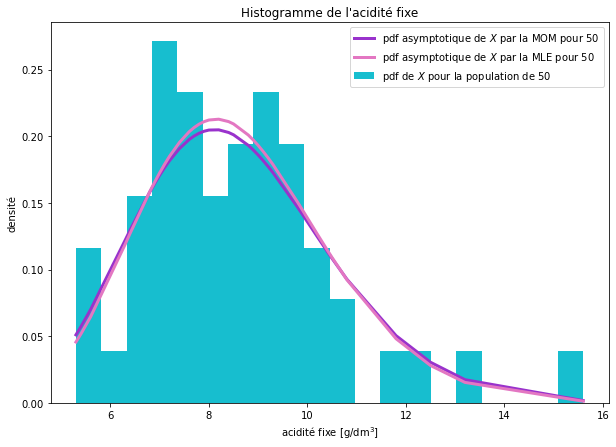

In [52]:
scale_mom = 1 / lambda_mom
scale_ml = 1 / lambda_ml

echantillon_sort = echantillon.sort_values()
gamma_mom_pdf_ech = stats.gamma.pdf(echantillon_sort, a = a_mom, scale = scale_mom)
gamma_ml_pdf_ech = stats.gamma.pdf(echantillon_sort, a = a_ml, scale = scale_ml)
fig = plt.figure(figsize=(10,7))
plt.plot(echantillon_sort, gamma_mom_pdf_ech, color='darkorchid', linewidth = 3, label=r'pdf asymptotique de $X$ par la MOM pour 50')
plt.plot(echantillon_sort, gamma_ml_pdf_ech, color='tab:pink', linewidth = 3, label=r'pdf asymptotique de $X$ par la MLE pour 50')

# plot the histogram
#plt.hist(fxd_acid, density=True, bins=70, color='tab:cyan', label=r'pdf de $X$ pour la population entière')
plt.hist(echantillon, density=True, bins=20, color='tab:cyan', label=r'pdf de $X$ pour la population de 50')
plt.xlabel('acidité fixe [g/dm$^3$]')
plt.ylabel('densité')
plt.title('Histogramme de l\'acidité fixe')
plt.legend(loc='best')
plt.show()

Que pouvez-vous en conclure ?

<span style="color:red">Les résultats des PDFs asymptotiques sont semblables.

Ils semblent assez bien collés à notre histogramme de la population de 50 vins donc notre facon de faire ces estimateurs semble correcte.

</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.6
Utilisez maintenant le module [SciPy](https://docs.scipy.org/doc/scipy/index.html) de Python pour réaliser un *fit* de la distribution de la variable étudiée (en considérant la population entière) pour une distribution $\mathrm{Gamma}$, afin de déterminer quelles valeurs de paramètres $a_\mathrm{fit}$ et $\lambda_\mathrm{fit}$ collent le plus à la population.

In [53]:
# MLE, par default
shape_fit_ml, loc_fit_ml, scale_fit_ml = stats.gamma.fit(fxd_acid, floc = 0)
a_fit_ml = shape_fit_ml
lambda_fit_ml = 1 / scale_fit_ml
print("a_fit_ml =", a_fit_ml)
print("lambda_fit_ml =", lambda_fit_ml)

a_fit_ml = 24.684114370550912
lambda_fit_ml = 2.9669700204095975


Superposez le modèle *fitté* à la superposition réalisée au point précédent.

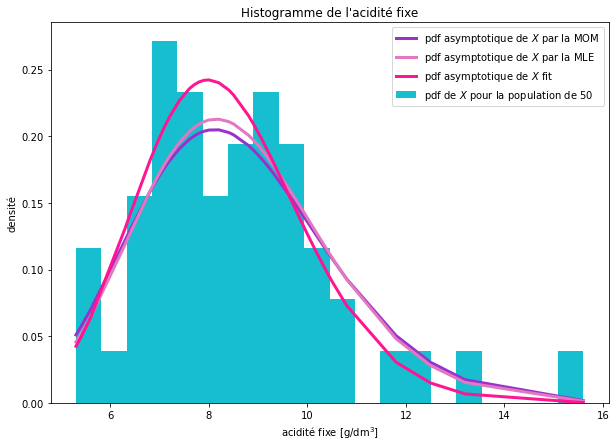

In [54]:
gamma_fit_ml_pdf_ech = stats.gamma.pdf(echantillon_sort, a = a_fit_ml, scale = scale_fit_ml)

echantillon_sort = echantillon.sort_values()
gamma_mom_pdf_ech = stats.gamma.pdf(echantillon_sort, a = a_mom, scale = scale_mom)
gamma_ml_pdf_ech = stats.gamma.pdf(echantillon_sort, a = a_ml, scale = scale_ml)
fig = plt.figure(figsize=(10,7))
plt.plot(echantillon_sort, gamma_mom_pdf_ech, color='darkorchid', linewidth = 3, label=r'pdf asymptotique de $X$ par la MOM')
plt.plot(echantillon_sort, gamma_ml_pdf_ech, color='tab:pink', linewidth = 3, label=r'pdf asymptotique de $X$ par la MLE')
plt.plot(echantillon_sort, gamma_fit_ml_pdf_ech, color='deeppink', linewidth = 3, label=r'pdf asymptotique de $X$ fit')

# plot the histogram
#plt.hist(fxd_acid, density=True, bins=70, color='tab:cyan', label=r'pdf de $X$ pour la population entière')
plt.hist(echantillon, density=True, bins=20, color='tab:cyan', label=r'pdf de $X$ pour la population de 50')
plt.xlabel('acidité fixe [g/dm$^3$]')
plt.ylabel('densité')
plt.title('Histogramme de l\'acidité fixe')
plt.legend(loc='best')
plt.show()

Au regard de cette superposition, qu'en déduisez-vous quant à la pertinence du modèle choisi pour décrire la variable étudiée ?

<span style="color:red"> On voit que les 3 PDFs sont presque les mêmes, donc notre facon d'estimer devait être très proche de la réalité. On remarque en plus que la méthode fit se rapproche d'autant plus de la MLE que de la MOM, ce qui est normal étant donné que notre fonction fit utilise la méthode de la MLE.
    
</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.7

Afin d'évaluer la qualité de vos estimateurs $\hat{\theta}_\mathrm{mom} = (\hat{a}_\mathrm{mom}, \hat{\lambda}_\mathrm{mom})$ et $\hat{\theta}_\mathrm{ml} = (\hat{a}_\mathrm{ml}, \hat{\lambda}_\mathrm{ml})$, vous considérez pour la suite la valeur $\theta_\mathrm{fit} = (a_\mathrm{fit}, \lambda_\mathrm{fit})$ comme étant la vraie valeur des paramètres $(a,\lambda)$, en considérant que la variable étudiée suit bien une $\mathrm{Gamma}(a, \lambda)$. Pour se faire, vous tirez 500 échantillons i.i.d. de 50 vins dans votre population et appliquez la procédure suivante.

- Pour chaque échantillon, calculez les estimateurs $\hat{a}_\mathrm{mom}$ et $\hat{\lambda}_\mathrm{mom}$. Calculez le biais, la variance et l'erreur quadratique moyenne de ces estimateurs.
- Faites de même pour les estimateurs $\hat{a}_\mathrm{ml}$ et $\hat{\lambda}_\mathrm{ml}$.

Présentez vos résultats dans une table.

In [55]:
# Number of repetitions
n_rep = 500

# Loop to generate samples and compute what is needed
fxd_acid_mean = np.zeros(n_rep)
fxd_acid_log_mean = np.zeros(n_rep)
lambda_mom = np.zeros(n_rep)
a_mom = np.zeros(n_rep)
lambda_ml = np.zeros(n_rep)
a_ml = np.zeros(n_rep)

# Creating the array to convert
Regrouping_array1 = np.zeros((1, 16))
Regrouping_array = np.zeros((3, 4))
  
for j in np.arange(n_rep):
    echantillon = fxd_acid.sample(n=n)
    fxd_acid_mean[j] = echantillon.mean()
    sum = 0
    fxd_acid_log_mean[j] = 0
    for k in range(n):
        tmp = echantillon.iat[k]
        sum += tmp**2
        fxd_acid_log_mean[j] += np.log(tmp)
    sum /= n
    fxd_acid_log_mean[j] /= n

    lambda_mom[j] = fxd_acid_mean[j] / (sum - fxd_acid_mean[j]**2)
    a_mom[j]= fxd_acid_mean[j] * lambda_mom[j]

    a_ml[j] = opt.fsolve(lambda x: np.log(x) - sp.digamma(x) - np.log(fxd_acid_mean[j]) + fxd_acid_log_mean[j], a_mom[j])[0]
    lambda_ml[j] = a_ml[j]/fxd_acid_mean[j]

E_a_mom = np.mean(a_mom)
E_lambda_mom = np.mean(lambda_mom)
E_a_ml = np.mean(a_ml)
E_lambda_ml = np.mean(lambda_ml)

Regrouping_array[0][0] = E_a_mom - a_fit_ml # biais_a_mom
Regrouping_array[1][0] = a_mom.var(ddof=1) # var_a_mom
Regrouping_array[2][0] = Regrouping_array[1][0] + (Regrouping_array[0][0])**2 # mse_a_mom

Regrouping_array[0][1] = E_lambda_mom - lambda_fit_ml # biais_lambda_mom
Regrouping_array[1][1] = lambda_mom.var(ddof=1) # var_lambda_mom
Regrouping_array[2][1] = Regrouping_array[1][1] + (Regrouping_array[0][1])**2 # mse_lambda_mom = var_lambda_mom + (biais_lambda_mom)**2

Regrouping_array[0][2] = E_a_ml - a_fit_ml # biais_a_ml
Regrouping_array[1][2] = a_ml.var(ddof=1) # var_a_ml
Regrouping_array[2][2] = Regrouping_array[1][2] + (Regrouping_array[0][2])**2 # mse_a_ml = var_a_ml + (biais_a_ml)**2

Regrouping_array[0][3] = E_lambda_ml - lambda_fit_ml # biais_lambda_ml
Regrouping_array[1][3] = lambda_ml.var(ddof=1) # var_lambda_ml
Regrouping_array[2][3] = Regrouping_array[1][3] + (Regrouping_array[0][3])**2 # mse_lambda_ml = var_lambda_ml + (biais_lambda_ml)**2

df = pd.DataFrame(Regrouping_array, columns=['a_mom', 'lambda_mom', 'a_ml', 'lambda_ml'],index = ['biais', 'variance', 'mse'])
df

,a_mom,lambda_mom,a_ml,lambda_ml
biais,0.251128,0.040160,1.914919,0.240855
variance,35.531508,0.562369,35.205478,0.563674
mse,35.594573,0.563982,38.872393,0.621685


Comparez les résultats obtenus pour les estimateurs $\mathrm{MOM}$ et $\mathrm{ML}$. Quelle méthode donne les meilleurs estimateurs ? Discutez.

<span style="color:red">Aussi bien pour $\lambda$ que pour a par MLE, le bais est plus élevés que par la MOM. L'erreur quadratique moyenne est donc elle aussi plus élevée. Les variances quant à elles sont semblables, elles ne nous apportent donc pas de résultats significatifs.

Ainsi, la MOM donne les meilleurs estimateurs.
    
</span>

<!-- END QUESTION -->

## 2. Estimation par intervalle

Dans cette partie, vous vous intéressez plus particulièrement à la variable "dixodyde de soufre total" du vin (*total sulfur dioxide* dans votre set de données), rendant compte de la quantité de cet additif servant d'antioxydant et d'antimicrobien.

Cette variable prend des valeurs positives et s'exprime en [$mg/dm^3$]. Vous faites l'hypothèse que cette variable suit une distribution $Exponentielle$ de paramètre $\lambda$, dont la PDF est donnée par

$$\lambda e^{-\lambda x},\; \text{pour} \; x>0.$$

On vous demande de construire des intervalles de confiance pour ce paramètre $\lambda$.

Vous décidez de calculer cet intervalle en utilisant deux méthodes : la méthode du pivot et la méthode du boostrap. Vous commencez par tester ces méthodes sur un échantillon de 50 vins.

<!-- BEGIN QUESTION -->

### Question 2.1 
Définissez mathématiquement un intervalle de confiance à 95% pour la variable étudiée en utilisant la méthode du pivot. Précisez quel est votre pivot et détaillez vos calculs. 

<span style="color:red">Soit Y la variable aléatoire du dioxyde de sulfure. 

$Y_j$ $\sim$ Expo($\lambda$)

$\rightarrow n \bar{Y} \sim$ Gamma($n, \lambda$)

$\rightarrow \lambda n \bar{Y} \sim$ Gamma($n, 1$)

$\lambda n \bar{Y}$ est notre pivot.

Construisons maintenant l'intervalle de confiance à 95%.

$P(Q_{Gamma_{(n, 1)}}(0.025) \leq \lambda n \bar{Y} \leq Q_{Gamma_{(n, 1)}}(0.975) = 0.975 - 0.025 = 0.95$

$P\left(\dfrac{Q_{Gamma_{(n, 1)}}(0.025)}{n \bar{Y}} \leq \lambda \leq \dfrac{Q_{Gamma_{(n, 1)}}(0.975)}{n \bar{Y}}\right) = 0.95$

L'intervalle de confiance à 95% pour $\lambda$ devient donc : 

$C(\textbf{Y}) = \left[\dfrac{Q_{Gamma_{(n, 1)}}(0.025)}{n \bar{Y}} \ ; \ \dfrac{Q_{Gamma_{(n, 1)}}(0.975)}{n \bar{Y}} \right]$
    
</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.2
Calculez cet intervalle pour votre échantillon de 50 vins.

In [114]:
data_sulf = data[['total sulfur dioxide']]
sulfur = data_sulf['total sulfur dioxide']

# sample size
n = 50
echantillon_sulf = sulfur.sample(n=n)
sulf_mean = echantillon_sulf.mean()

#Gamma(n, 1)
Q_025 = stats.gamma.ppf(0.025, a = n, loc=0, scale=1)
Q_975 = stats.gamma.ppf(0.975, a = n, loc=0, scale=1)

tmp = n * sulf_mean
CI_low = Q_025 / tmp
CI_high = Q_975 / tmp
print("CI : [", CI_low, ";", CI_high, "]")

CI : [ 0.015862775694576562 ; 0.027689933145081554 ]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.3 
Expliquez comment vous pouvez déterminer un intervalle de confiance à 95% en utilisant la méthode du boostrap.

<span style="color:red">Soit l'estimateur de notre vraie population $\hat{\lambda} = T(Y_1, ... , Y_n)$

Générons B = 100 bootstraps et calculons $\hat{\lambda}^* = T(\textbf{Y}^*)$ de nos B échantillons,  

Par la méthode de percentile, on utilise les quantiles d'échantillon de nos $\hat{\lambda}$. L'intervalle va du quantile 0,025 au quantile 0,975. 

On trouve donc l'interval percentile suivant : 

$\left[\hat{\lambda}^*_{(\lceil 0,025.B\rceil)} \ ; \ \hat{\lambda}^*_{(\lceil 0,975.B\rceil)}\right]$ = $\left[\hat{\lambda}^*_{(\lceil 2,5\rceil)} \ ; \ \hat{\lambda}^*_{(\lceil 97,5\rceil)}\right]$

</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.4 
Calculez cet intervalle pour votre échantillon de 50 vins, en utilisant 100 échantillons bootstrap.

In [115]:
donnees = (echantillon_sulf.to_numpy(),)
# nombre échantillons bootstrap
B = 100

#mu = 1/lambda
CI_mu = stats.bootstrap(donnees, np.mean, n_resamples = B, confidence_level = 0.95, random_state = 1, method = 'percentile')
CI_low = 1 / CI_mu.confidence_interval[1]
CI_high = 1 / CI_mu.confidence_interval[0]
print("CI avec mean : [", CI_low, ";", CI_high, "]")

CI avec mean : [ 0.017991112390479104 ; 0.02633554112953136 ]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.5
Pour comparer vos deux méthodes, vous décidez de calculer des intervalles de confiance pour des tailles d'échantillons de 5 à 50 (avec un incrément de 5). Pour chaque taille d'échantillon, tirez 500 échantillons. Pour chaque échantillons, construisez deux intervalles de confiance à 95 % en utilisant d'une part la méthode du pivot et d'autre part la méthode du bootstrap avec 100 échantillons bootstrap.

In [116]:
sample_size = np.arange(5, 51, 5)
N = 500
length = len(sample_size)
CI_piv_low = np.zeros((length, N))
CI_piv_high = np.zeros((length, N))
CI_boo_low = np.zeros((length, N))
CI_boo_high = np.zeros((length, N))
largeur_piv_moy = np.zeros(length)
largeur_boo_moy = np.zeros(length)

k = 0
for i in sample_size:
    for j in range(N):
        echantillon_sulf = sulfur.sample(n=i)
        sulf_mean = echantillon_sulf.mean()
        Q_025 = stats.gamma.ppf(0.025, a = i, loc=0, scale=1)
        Q_975 = stats.gamma.ppf(0.975, a = i, loc=0, scale=1)

        tmp = i * sulf_mean
        CI_piv_low[k][j] = Q_025 / tmp
        CI_piv_high[k][j] = Q_975 / tmp

        donnees = (echantillon_sulf.to_numpy(),)
        CI_mu = stats.bootstrap(donnees, np.mean, n_resamples = B, confidence_level = 0.95, random_state = 1, method = 'percentile')
        CI_boo_low[k][j] = 1 / CI_mu.confidence_interval[1]
        CI_boo_high[k][j] = 1 / CI_mu.confidence_interval[0]

    largeur_piv_moy[k] = np.mean(CI_piv_high[k] - CI_piv_low[k])
    largeur_boo_moy[k] = np.mean(CI_boo_high[k] - CI_boo_low[k])
  
    k += 1

Analysez l'évolution de la largeur moyenne de ces intervalles en fonction de la taille d'échantillon. 

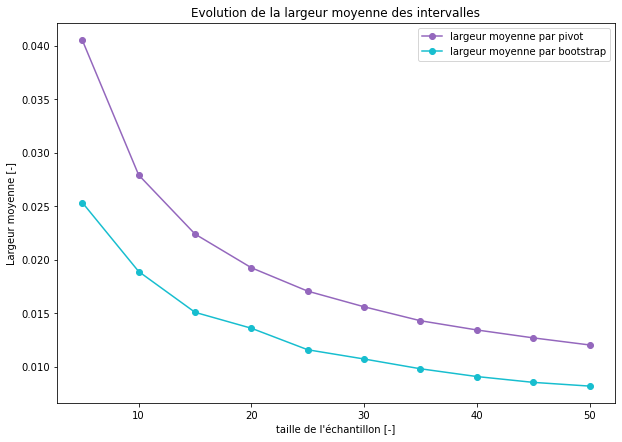

In [117]:
fig = plt.figure(figsize=(10,7))
plt.plot(sample_size, largeur_piv_moy, '-o', c = 'tab:purple', label=r'largeur moyenne par pivot')
plt.plot(sample_size, largeur_boo_moy, '-o', c = 'tab:cyan', label=r'largeur moyenne par bootstrap')
plt.xlabel('taille de l\'échantillon [-]')
plt.ylabel(r'Largeur moyenne [-]')
plt.title('Evolution de la largeur moyenne des intervalles')
plt.legend(loc='best')
plt.show()

Comparez les deux méthodes.

<span style="color:red">On remarque que la méthode du pivot choisie est moins précise que bootstrap et cela est particulièrement observé pour un échantillon petit.
    
</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.6 
Supposons que la variable étudiée dans la population suit effectivement une loi $Exponentielle$. Réalisez un *fit* de la distribution de la population afin de déterminer la valeur de $\lambda_\mathrm{fit}$, le paramètre "optimal" de la loi exponentielle pour votre population. Pour cela, utilisez le module [SciPy](https://docs.scipy.org/doc/scipy/index.html) de Python.

In [118]:
loc_fit, scale_fit = stats.expon.fit(sulfur, floc = 0)
lambda_fit = 1 / scale_fit
print("lambda_fit =", lambda_fit)

lambda_fit = 0.021520282092002907


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.7
En reprenant la même marche à suivre qu'à la **question 2.5**, analysez maintenant l’évolution de la proportion d’intervalles contenant la valeur fittée du paramètre $\lambda$, *i.e.* $\lambda_\mathrm{fit}$, en fonction de la taille d’échantillon. 

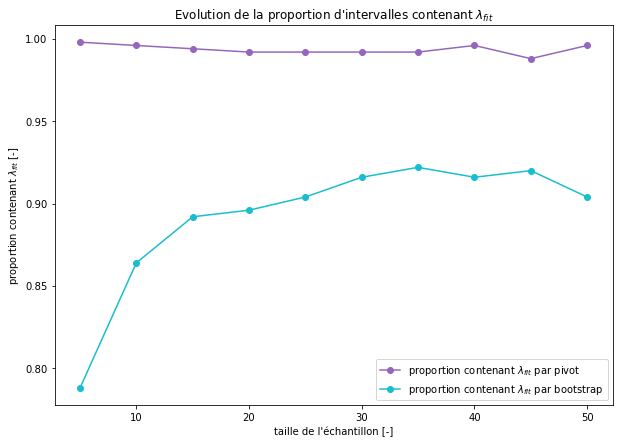

In [119]:
prop_interval_piv = np.zeros(length)
prop_interval_boo = np.zeros(length)
for i in range(length):
    for j in range(N):
        prop_interval_piv[i] += ((CI_piv_low[i][j] < lambda_fit) & (lambda_fit < CI_piv_high[i][j]))
        prop_interval_boo[i] += ((CI_boo_low[i][j] < lambda_fit) & (lambda_fit < CI_boo_high[i][j]))

prop_interval_piv /= N
prop_interval_boo /= N

fig = plt.figure(figsize=(10,7))
plt.plot(sample_size, prop_interval_piv, '-o', c = 'tab:purple', label=r'proportion contenant $\lambda_{fit}$ par pivot')
plt.plot(sample_size, prop_interval_boo, '-o', c = 'tab:cyan', label=r'proportion contenant $\lambda_{fit}$ par bootstrap')
plt.xlabel('taille de l\'échantillon [-]')
plt.ylabel(r'proportion contenant $\lambda_{fit}$ [-]')
plt.title('Evolution de la proportion d\'intervalles contenant $\lambda_{fit}$')
plt.legend(loc='best')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comparez les deux méthodes.

<span style="color:red">Le pivot, malgré le fait qu'on avait dit qu'il était moins précis pour un petit échantillon trouve plus souvent que bootstrap un intervalle qui contient réellement la valeur attendue. Bootstrap s'améliore à partir d'une taille d'échantillon de 15-20 vins. Il reste cependant toujours moins performant que le pivot.
    
</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Était-il raisonnable de supposer que la variable étudiée suit une distribution $Exponentielle$ ?

<span style="color:red">Ayant trouvé une proportion d'intervalles de confiance contenant $\lambda_{fit}$ assez élevée, on peut en conclure qu'il est fort probable que la variable suivent une Exponentielle. Les seules données qui pourraient nous faire douter, sont celles pour les petits échantillons calculées avec bootstrap. Notons qu'il est possible que cela soit dû à la petite taille de l'échantillon.
    
</span>

<!-- END QUESTION -->

## 3. Test d'hypothèse

Dans la communauté étudiante liégeoise, il n'est pas rare de faire l'hypothèse que plus un breuvage est alcoolisé, mieux c'est. Dans le cadre de ce devoir, vous allez vérifier cette hypothèse pour les vins considérés, en utilisant les données des variables "alcool" et "qualité" (resp. *alcohol* et *quality* dans votre set de données). Vous avez déjà étudié la première variable dans le cadre du premier devoir et la seconde, basée sur des données sensorielles, prend des valeurs entre 3 et 8.

En d'autres termes, vous souhaitez tester l'hypothèse alternative $H_1$ : "le taux d'alcool d'un vin de qualité est en moyenne inférieur au taux d'alcool d'un vin de faible qualité", face à l'hypothèse nulle $H_0$ : "le taux d'alcool d'un vin de qualité est en moyenne supérieur ou égal au taux d'alcool d'un vin de faible qualité". 

Vous allez donc comparer le taux d'alcool des vins de deux groupes :
- ceux dont la qualité est faible (score (strictement) en dessous de la médiane des qualités de la population entière) et
- ceux dont elle est élevée (score en dessous de la médiane des qualités de la population entière),

afin de vérifier l'hypothèse (imbibée) des étudiants liégeois. *hips !*

<!-- BEGIN QUESTION -->

### Question 3.1
Formulez une hypothèse nulle et l'hypothèse alternative correspondante qui vous premettront de réaliser un test statistique pour établir votre comparaison.

<span style="color:red">On cherche à montrer qu’en divisant au milieu notre population, la différence des moyennes des taux d'alcool des vins de qualité élevée $\mu_e$ et des vins de faibles qualités $\mu_f$ est plus grande que 0.

$H_0: \mu_e \geq \mu_f \Leftrightarrow \mu_e - \mu_f \geq 0$

$H_1: \mu_e < \mu_f \Leftrightarrow \mu_e - \mu_f < 0$
    
</span>

Vérifiez laquelle de ces hypotyhèses est vraie dans votre population.

In [3]:
data_alcohol = data[['alcohol']]
alcohol = data_alcohol['alcohol']

data_quality = data[['quality']]
quality = data_quality['quality']

quality_median = quality.median()
quality_high = data_quality.loc[quality >= quality_median]
quality_low = data_quality.loc[quality < quality_median]

index_high = quality_high.index
index_low = quality_low.index

alcohol_qual_high = alcohol.loc[index_high]
alcohol_qual_low = alcohol.loc[index_low]

alcohol_qual_high_mean = alcohol_qual_high.mean()
alcohol_qual_low_mean = alcohol_qual_low.mean()

if alcohol_qual_high_mean >= alcohol_qual_low_mean:
    print("On n'élimine pas H_0.")
    print("Le taux d'alcool d'un vin de qualité est en moyenne supérieur ou égal au taux d'alcool d'un vin de faible qualité.")

else:
    print("On élimine H_0 et on retient H_1")
    print("Le taux d'alcool d'un vin de qualité est en moyenne inférieur au taux d'alcool d'un vin de faible qualité.")

On n'élimine pas H_0.
Le taux d'alcool d'un vin de qualité est en moyenne supérieur ou égal au taux d'alcool d'un vin de faible qualité.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3.2 
Décrivez comment réaliser un test d'hypothèse au seuil de signification $\alpha = 5 \%$ pour l'hypothèse formulée précédemment sur un échantillon de taille $n = n_f + n_e$, où $n_f$ est le nombre de vins de faible qualité et $n_e$ est le nombre de vins de qualité élevée. Considérez que les variances de population sont égales et inconnues.

<span style="color:red">Soit $E_1, E_2,..., E_{n_e} \overset{\text{i.i.d.}}{\sim} E$ les vins de qualité élevée independants de $F_1, F_2,..., E_{n_f} \overset{\text{i.i.d.}}{\sim} F$ les vins de faibles qualités avec des moyennes inconnues $\mu_e = E(E)$ et $\mu_f = E(F)$

Le cas le plus simple est un modèle où $E_i \sim \mathcal{N}(\mu_e, \sigma^2)$ et $F_i \sim \mathcal{N}(\mu_f, \sigma^2)$, où les deux groupes ont le même $\sigma$.

Ce $\sigma$ étant inconnu, estimons le.

$\displaystyle S_e^2 = \dfrac{1}{n_e-1}\sum_{i=1}^{n_e} (E_i - \bar{E})^2, \quad \text{et} \quad S_f^2 = \dfrac{1}{n_f-1}\sum_{i=1}^{n_f} (F_i - \bar{F})^2$

Par la théorie de la normale, on sait que $\dfrac{(n_e - 1) S_e^2}{\sigma^2} \sim \chi^2_{n_e-1}$ est indépendant de $\dfrac{(n_f - 1) S_f^2}{\sigma^2} \sim \chi^2_{n_f-1}$, donc

$\dfrac{(n_e - 1) S_e^2}{\sigma^2} + \dfrac{(n_f - 1) S_f^2}{\sigma^2} \sim \chi^2_{n_e + n_f-2}$

On peut ainsi trouver $\sigma^2$ en regroupant ces deux estimateurs dans $\displaystyle S_{pooled}^2 = \dfrac{1}{n_e+n_f-2}\left( \sum_{i=1}^{n_e} (E_i - \bar{E})^2 + \sum_{i=1}^{n_f} (F_i - \bar{F})^2 \right) = \dfrac{(n_e - 1) S_e^2 + (n_f - 1) S_f^2}{n_e + n_f - 2}$


On utilise le test de statistique
$T = \bar{E} - \bar{F}$
où 
$\bar{E} - \bar{F} \sim \mathcal{N}\left(\mu_e-\mu_f,S^2_\mathrm{pooled}\left(\frac{1}{n_e}+\frac{1}{n_f}\right)\right).$

$\Leftrightarrow T = \dfrac{(\bar{E} - \bar{F})-(\mu_e - \mu_f)}{S_{pooled}\sqrt{\dfrac{1}{n_e}+\dfrac{1}{n_f}}} \sim t_{n_e + n_f - 2}$

On rejette alors $H_0 \ (\mu_e - \mu_f \geq 0)$ et on prend alors $H_1 \ (\mu_e - \mu_f < 0)$ au seuil de signification $\alpha$ si

$\dfrac{\bar{E} - \bar{F} - 0}{S_{pooled} \sqrt{\dfrac{1}{n_e} + \dfrac{1}{n_f}}} = \dfrac{\bar{E} - \bar{F}}{S_{pooled} \sqrt{\dfrac{1}{n_e} + \dfrac{1}{n_f}}} < - Q_{t_{n_e + n_f - 2}}(1 - \alpha) = Q_{t_{n_e + n_f - 2}}(\alpha) $

</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3.3 
Tirez 100 échantillons i.i.d. de 75 vins. Pour chaque échantillon, testez l'hypothèse au seuil de signification $\alpha = 5 \%$. 

In [95]:
# sample size
n = 75

# Number of repetitions
n_rep = 100

# seuil de signification
alpha = 0.05

ddl = n - 2 # n_e + n_f - 2
Q = stats.t.ppf(alpha, df=ddl)

proportion = 0
nombre = 0

# Loop to generate samples and compute what is needed
for i in np.arange(n_rep):
    echantillons = quality.sample(n=n)

    ech_quality_high = echantillons.loc[quality >= quality_median]
    ech_quality_low = echantillons.loc[quality < quality_median]

    ech_index_high = ech_quality_high.index
    ech_index_low = ech_quality_low.index

    ech_alcohol_qual_high = alcohol.loc[ech_index_high]
    ech_alcohol_qual_low = alcohol.loc[ech_index_low]

    ech_alcohol_qual_high_mean = ech_alcohol_qual_high.mean()
    ech_alcohol_qual_low_mean = ech_alcohol_qual_low.mean()

    n_e = ech_alcohol_qual_high.size
    n_f = ech_alcohol_qual_low.size

    #on evite la division par 0
    if(n_f == 0):
        continue
    if(n_e == 0):
        continue

    S_e_2 = ech_alcohol_qual_high.var()
    S_f_2 = ech_alcohol_qual_low.var()
    S_p_2 = ((n_e - 1)*S_e_2 + (n_f - 1)*S_f_2)/(ddl)

    test_hyp = (ech_alcohol_qual_high_mean - ech_alcohol_qual_low_mean)/(np.sqrt(S_p_2) * np.sqrt(1/n_e + 1/n_f))

    proportion += test_hyp < Q # if = 1 we reject H_0
    nombre += 1

#on ne prend pas en compte les echantillons de taille nulle
proportion *= 100/nombre

Parmi les 100 échantillons, dans quelle proportion l'hypothèse nulle est-elle rejetée ? 

In [96]:
print("On a rejeté", proportion, "%")

On a rejeté 0.0 %


Comparez cette valeur à $\alpha$. Interprétez.

<span style="color:red">On sait que $\alpha$ est la propabilité maximum possible d'avoir une erreur de type-I.
    
On remarque donc que notre proportion de réjection est bien plus faible que $\alpha$  étant donné qu'il n'y a aucun rejet.
    
</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3.4
Sans modifier votre méthode de construction du test, répétez la même expérience avec 100 échantillons i.i.d. de **25** vins.

In [107]:
# sample size
n = 25

proportion = 0
nombre = 0

# Loop to generate samples and compute what is needed
for i in np.arange(n_rep):
    echantillons = quality.sample(n=n)

    ech_quality_high = echantillons.loc[quality >= quality_median]
    ech_quality_low = echantillons.loc[quality < quality_median]

    ech_index_high = ech_quality_high.index
    ech_index_low = ech_quality_low.index

    ech_alcohol_qual_high = alcohol.loc[ech_index_high]
    ech_alcohol_qual_low = alcohol.loc[ech_index_low]

    ech_alcohol_qual_high_mean = ech_alcohol_qual_high.mean()
    ech_alcohol_qual_low_mean = ech_alcohol_qual_low.mean()

    n_e = ech_alcohol_qual_high.size
    n_f = ech_alcohol_qual_low.size

    #on evite la division par 0
    if(n_f == 0):
        continue
    if(n_e == 0):
        continue

    S_e_2 = ech_alcohol_qual_high.var()
    S_f_2 = ech_alcohol_qual_low.var()
    S_p_2 = ((n_e - 1)*S_e_2 + (n_f - 1)*S_f_2)/(ddl)

    test_hyp = (ech_alcohol_qual_high_mean - ech_alcohol_qual_low_mean)/(np.sqrt(S_p_2) * np.sqrt(1/n_e + 1/n_f))

    proportion += test_hyp < Q # if = 1 we reject H_0
    nombre += 1

#on ne prend pas en compte les echantillons de taille nulle
proportion *= 100/nombre

print("On a rejeté", proportion, "%")

On a rejeté 0.0 %


Comparez au point précédent et interprétez.

<span style="color:red">Tout d'abord, la valeur trouvée est soit égale soit légerement plus grande de 1% que celle pour des échantillons de taille 75. On a donc plus de chance de rejeter $H_0$ si $n=25$ que $n=75$.
    
    
Cela semble cohérent avec notre formule de réjection de $H_0$ qui est
    
$\dfrac{\bar{E} - \bar{F}}{S_{pooled} \sqrt{\dfrac{1}{n_e} + \dfrac{1}{n_f}}} < Q_{t_{n_e + n_f - 2}}(0.05)$

Étant donné que la taille $n$ de nos échantillons diminue, $n_e$ et $n_f$ diminuent eux aussi. Leur inverse augmente donc le dénominateur augmente et la fraction globale diminue. L'intervalle est donc diminué. La réjection est alors plus fréquente, ce qui est bien ce que l'on observe.

Ensuite, nous avons remarqué que $Q_{t_{n_e + n_f - 2}}(0.05)$ est un nombre négatif, alors que le dénominateur $S_{pooled} \sqrt{\dfrac{1}{n_e} + \dfrac{1}{n_f}}$ est positif. Du coup, le seul terme pouvant faire en sorte que la condition de rejection soit vérifiée est $\bar{E} - \bar{F}$. Ce terme est en général positif mais est négatif si notre hypothèse est rejetée.

Remarquons que le taux de réjection reste donc plus faible que $\alpha$.
    
</span>